# Turing tutorial

In this tutorial we learn the basics of Turing in Julia where the model requires solving differential equations.

**Where to get more information?**

- Official [Github repo](https://github.com/TuringLang/Turing.jl).

- Full [tutorial](https://storopoli.io/Bayesian-Julia/#environment) by Jose Storopoli.


In [1]:
using Turing
# using Statistics
# using Distributions
# using StatsBase
# using Random
using Optim
using Plots, StatsPlots
using OrdinaryDiffEq
using DataFrames
using CSV, HTTP
# using BenchmarkTools

## Simple model

In [2]:
@model function demo(y)
    μ ~ Normal()
    σ ~ Exponential(1)
    y ~ Normal(μ, σ)
end

demo (generic function with 2 methods)

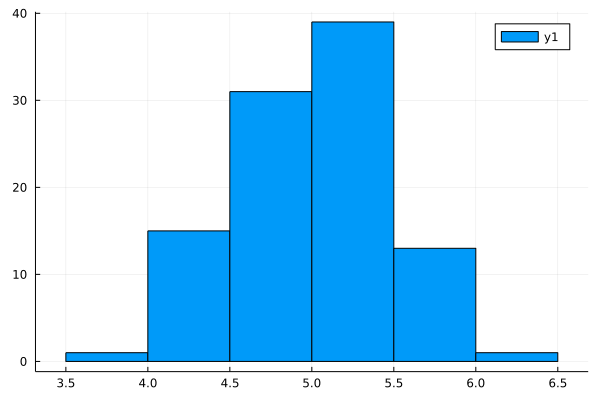

In [3]:
data = rand(Normal(5, 0.5), 100)
plot(data, seriestype=:histogram)

In [4]:
chains = mapreduce(c -> sample(demo(data), NUTS(), 4_000), chainscat, 1:4)
# Other samplers.
# c1 = sample(demo(data), SMC(), 1000)
# c2 = sample(demo(data), PG(10), 1000)
# c3 = sample(demo(data), HMC(0.1, 5), 1000)
# c4 = sample(demo(data), Gibbs(PG(10, :m), HMC(0.1, 5, :s)), 1000)
# c5 = sample(demo(data), HMCDA(0.15, 0.65), 1000)
# c6 = sample(demo(data), NUTS(0.65), 1000)
# MLE, requires `using Optim`
# mle_est = optimize(inference(data), MLE(), NelderMead())

┌ Info: Found initial step size
│   ϵ = 0.00625
└ @ Turing.Inference /home/shigoto/.julia/packages/Turing/Ir2iS/src/inference/hmc.jl:188
Sampling: 100%|█████████████████████████████████████████| Time: 0:00:00
┌ Info: Found initial step size
│   ϵ = 0.05
└ @ Turing.Inference /home/shigoto/.julia/packages/Turing/Ir2iS/src/inference/hmc.jl:188
Sampling: 100%|█████████████████████████████████████████| Time: 0:00:00
┌ Info: Found initial step size
│   ϵ = 0.2
└ @ Turing.Inference /home/shigoto/.julia/packages/Turing/Ir2iS/src/inference/hmc.jl:188
Sampling: 100%|█████████████████████████████████████████| Time: 0:00:00
┌ Info: Found initial step size
│   ϵ = 0.2
└ @ Turing.Inference /home/shigoto/.julia/packages/Turing/Ir2iS/src/inference/hmc.jl:188
Sampling: 100%|█████████████████████████████████████████| Time: 0:00:00


Chains MCMC chain (4000×14×4 Array{Float64, 3}):

Iterations        = 1001:1:5000
Number of chains  = 4
Samples per chain = 4000
Wall duration     = 15.61 seconds
Compute duration  = 12.51 seconds
parameters        = μ, σ
internals         = lp, n_steps, is_accept, acceptance_rate, log_density, hamiltonian_energy, hamiltonian_energy_error, max_hamiltonian_energy_error, tree_depth, numerical_error, step_size, nom_step_size

Summary Statistics
  parameters      mean       std   naive_se      mcse          ess      rhat   ⋯
      Symbol   Float64   Float64    Float64   Float64      Float64   Float64   ⋯

           μ    4.9993    0.0467     0.0004    0.0003   16759.6190    1.0001   ⋯
           σ    0.4608    0.0332     0.0003    0.0003   15874.0585    1.0005   ⋯
                                                                1 column omitted

Quantiles
  parameters      2.5%     25.0%     50.0%     75.0%     97.5% 
      Symbol   Float64   Float64   Float64   Float64   Float64 

        

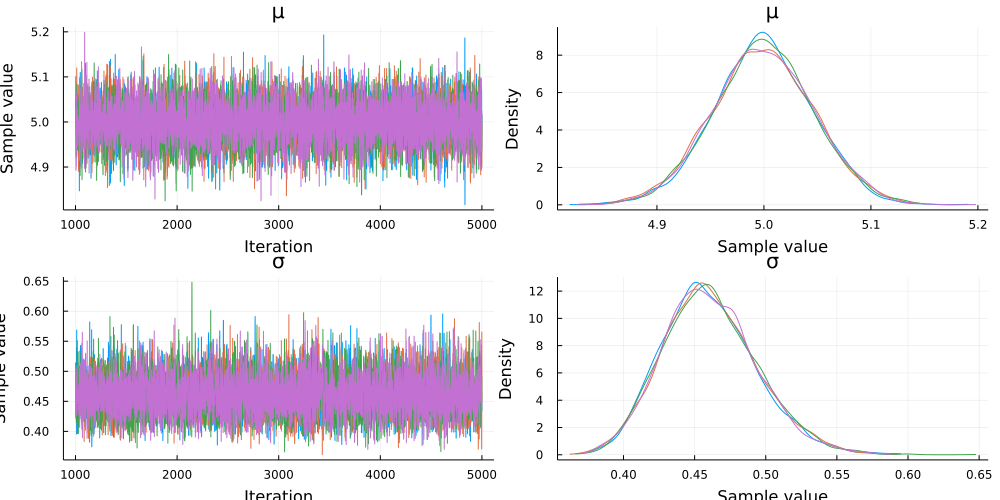

In [5]:
# Summarise results
describe(chains)

# Plot results
plot(chains)

┌ Warning: Keyword argument hover not supported with Plots.GRBackend().  Choose from: Set([:top_margin, :group, :inset_subplots, :background_color, :ytickfontsize, :yforeground_color_text, :yguidefontcolor, :tickfontfamily, :show_empty_bins, :seriesalpha, :seriescolor, :ztick_direction, :xgrid, :ygridalpha, :zlims, :xtick_direction, :colorbar, :legend_font_family, :zflip, :ticks, :linealpha, :overwrite_figure, :arrow, :xguidefonthalign, :normalize, :linestyle, :xtickfontvalign, :xflip, :zgrid, :fillcolor, :ygrid, :bar_width, :colorbar_scale, :background_color_inside, :zguidefonthalign, :bins, :zguide, :zforeground_color_text, :legend_font_valign, :yscale, :legend_font_color, :weights, :xgridalpha, :ygridstyle, :clims, :xtickfontcolor, :fill_z, :xguide, :markershape, :background_color_subplot, :ztickfontfamily, :fillalpha, :markerstrokewidth, :tick_direction, :xguidefontvalign, :xguidefontfamily, :gridlinewidth, :foreground_color_subplot, :xgridlinewidth, :yguidefontsize, :foreground_co

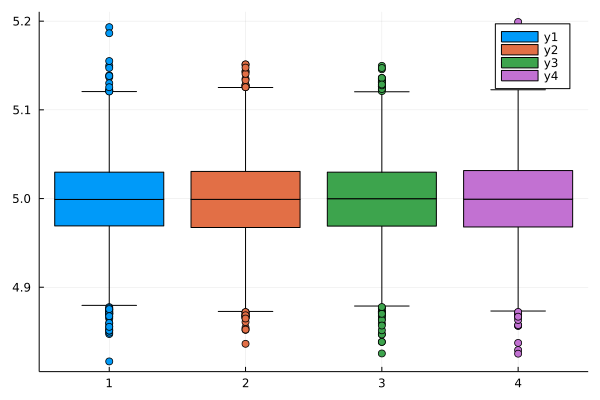

In [6]:
boxplot(chains[:μ])

## Simple model with for loop

In [7]:
@model function demo2(y)
    μ ~ Normal()
    σ ~ Exponential(1)
    for i in eachindex(y)
        y[i] ~ Normal(μ, σ)
    end
end

demo2 (generic function with 2 methods)

In [8]:
import Logging
Logging.disable_logging(Logging.Warn);

In [9]:
@time chains2 = mapreduce(c -> sample(demo2(data), NUTS(), 4_000), chainscat, 1:4)
display(chains2)
@time chains = mapreduce(c -> sample(demo(data), NUTS(), 4_000), chainscat, 1:4)
display(chains)

Chains MCMC chain (4000×14×4 Array{Float64, 3}):

Iterations        = 1001:1:5000
Number of chains  = 4
Samples per chain = 4000
Wall duration     = 3.32 seconds
Compute duration  = 3.08 seconds
parameters        = μ, σ
internals         = lp, n_steps, is_accept, acceptance_rate, log_density, hamiltonian_energy, hamiltonian_energy_error, max_hamiltonian_energy_error, tree_depth, numerical_error, step_size, nom_step_size

Summary Statistics
  parameters      mean       std   naive_se      mcse          ess      rhat   ⋯
      Symbol   Float64   Float64    Float64   Float64      Float64   Float64   ⋯

           μ    4.9984    0.0466     0.0004    0.0004   16636.7292    1.0001   ⋯
           σ    0.4611    0.0336     0.0003    0.0003   15866.3213    0.9999   ⋯
                                                                1 column omitted

Quantiles
  parameters      2.5%     25.0%     50.0%     75.0%     97.5% 
      Symbol   Float64   Float64   Float64   Float64   Float64 

          

  5.227588 seconds (14.56 M allocations: 1017.662 MiB, 5.16% gc time, 85.84% compilation time)


Chains MCMC chain (4000×14×4 Array{Float64, 3}):

Iterations        = 1001:1:5000
Number of chains  = 4
Samples per chain = 4000
Wall duration     = 0.64 seconds
Compute duration  = 0.57 seconds
parameters        = μ, σ
internals         = lp, n_steps, is_accept, acceptance_rate, log_density, hamiltonian_energy, hamiltonian_energy_error, max_hamiltonian_energy_error, tree_depth, numerical_error, step_size, nom_step_size

Summary Statistics
  parameters      mean       std   naive_se      mcse          ess      rhat   ⋯
      Symbol   Float64   Float64    Float64   Float64      Float64   Float64   ⋯

           μ    4.9995    0.0460     0.0004    0.0004   16608.7331    1.0001   ⋯
           σ    0.4609    0.0332     0.0003    0.0003   15257.5318    1.0000   ⋯
                                                                1 column omitted

Quantiles
  parameters      2.5%     25.0%     50.0%     75.0%     97.5% 
      Symbol   Float64   Float64   Float64   Float64   Float64 

          

  0.702224 seconds (6.52 M allocations: 553.939 MiB, 17.37% gc time, 5.13% compilation time)


## User defined log-likelihood

In [12]:
myloglikelihood(y, μ, σ) = loglikelihood(Normal(μ, σ), y)
# same as
# myloglikelihood2(y::AbstractFloat, μ, σ) = -0.5log(2π) - 0.5log(σ^2) - 1/2σ^2*(y - μ)^2
# myloglikelihood2(y::AbstractArray, μ, σ) = sum(myloglikelihood2.(y, μ, σ))

@model function demo3(y)
    μ ~ Normal()
    σ ~ Exponential(1)
    Turing.@addlogprob! myloglikelihood(y, μ, σ)
end

demo3 (generic function with 2 methods)

In [13]:
@time chains3 = mapreduce(c -> sample(demo3(data), NUTS(), 4_000), chainscat, 1:4)
display(chains3)
@time chains = mapreduce(c -> sample(demo(data), NUTS(), 4_000), chainscat, 1:4)
display(chains)

Chains MCMC chain (4000×14×4 Array{Float64, 3}):

Iterations        = 1001:1:5000
Number of chains  = 4
Samples per chain = 4000
Wall duration     = 3.64 seconds
Compute duration  = 3.25 seconds
parameters        = μ, σ
internals         = lp, n_steps, is_accept, acceptance_rate, log_density, hamiltonian_energy, hamiltonian_energy_error, max_hamiltonian_energy_error, tree_depth, numerical_error, step_size, nom_step_size

Summary Statistics
  parameters      mean       std   naive_se      mcse          ess      rhat   ⋯
      Symbol   Float64   Float64    Float64   Float64      Float64   Float64   ⋯

           μ    4.9987    0.0464     0.0004    0.0004   15540.1833    0.9999   ⋯
           σ    0.4611    0.0332     0.0003    0.0003   15168.1802    0.9999   ⋯
                                                                1 column omitted

Quantiles
  parameters      2.5%     25.0%     50.0%     75.0%     97.5% 
      Symbol   Float64   Float64   Float64   Float64   Float64 

          

  5.777366 seconds (14.42 M allocations: 1.004 GiB, 5.46% gc time, 87.39% compilation time)


Chains MCMC chain (4000×14×4 Array{Float64, 3}):

Iterations        = 1001:1:5000
Number of chains  = 4
Samples per chain = 4000
Wall duration     = 0.67 seconds
Compute duration  = 0.56 seconds
parameters        = μ, σ
internals         = lp, n_steps, is_accept, acceptance_rate, log_density, hamiltonian_energy, hamiltonian_energy_error, max_hamiltonian_energy_error, tree_depth, numerical_error, step_size, nom_step_size

Summary Statistics
  parameters      mean       std   naive_se      mcse          ess      rhat   ⋯
      Symbol   Float64   Float64    Float64   Float64      Float64   Float64   ⋯

           μ    4.9988    0.0466     0.0004    0.0004   12787.1033    1.0001   ⋯
           σ    0.4607    0.0329     0.0003    0.0003   13211.5011    1.0001   ⋯
                                                                1 column omitted

Quantiles
  parameters      2.5%     25.0%     50.0%     75.0%     97.5% 
      Symbol   Float64   Float64   Float64   Float64   Float64 

          

  0.735713 seconds (6.53 M allocations: 555.027 MiB, 14.16% gc time, 4.82% compilation time)


## Example: linear regression model

A probabilistic model can be defined using the magic function `@model` followed by the name of the function where the input variables are the data and other parameters. Here, I'm defining the linear regressor
$$
    y \sim \text{Normal}(\mu, \sigma) \\
    \mu = \alpha + \mathbf{X}\beta \\
    \alpha \sim \text{Normal}(\bar{\mathbf{y}}, 2.5 \cdot \sigma_{\mathbf{y}}) \\
    \beta \sim \text{Student-}t_3(0, 1) \\
    \sigma \sim \text{Exponential(1)}
$$
where $\bf{X}$ is the design matrix, and $\bar{\bf{y}}$ and $\sigma_{\bf{y}}$ are the mean and standard devaition of the the output data. The symbol `~` indicates either inference parameters when defined internally or output variable (likelihood) when defined within the function arguments. In either case, those are the variables to be sampled.

In [14]:
@model function linreg(X, y; predictors=size(X, 2))
    ## priors
    α ~ Normal(mean(y), 2.5 * std(y))
    ## the filldist function creates a vector of distributions  
    β ~ filldist(TDist(3), predictors)
    σ ~ Exponential(1)

    ## likelihood
    y ~ MvNormal(α .+ X * β, σ)
end

linreg (generic function with 2 methods)

Let's test the model using the Children's IQ Score data (Gelman & Hill, 2007).

In [15]:
url = "https://raw.githubusercontent.com/storopoli/Bayesian-Julia/master/datasets/kidiq.csv"
kidiq = CSV.read(HTTP.get(url).body, DataFrame)
X = Matrix(select(kidiq, Not(:kid_score)))
y = kidiq[:, :kid_score]
describe(kidiq)

,variable,mean,min,median,max,nmissing,eltype
,Symbol,Float64,Real,Float64,Real,Int64,DataType
1,kid_score,86.7972,20,90.0,144,0,Int64
2,mom_hs,0.785714,0,1.0,1,0,Int64
3,mom_iq,100.0,71.0374,97.9153,138.893,0,Float64
4,mom_age,22.7857,17,23.0,29,0,Int64


Now, I assign data to the model and sample 4 Markov chains with 2000 samples from the posterior using No U-Turns (NUTS) sampler.
The default display shows the estimated mean, standar deviation, effective sample size, and quartiles for each parameter.

In [16]:
# For single thread initialization use mapreduce
chains = mapreduce(c -> sample(linreg(X, y), NUTS(), 2_000), chainscat, 1:4)
# otherwise you can specify the multithreads (and even multiple processes, see Turing docs)
# chains = sample(model, NUTS(), MCMCThreads(), 2_000, 4)

Chains MCMC chain (2000×17×4 Array{Float64, 3}):

Iterations        = 1001:1:3000
Number of chains  = 4
Samples per chain = 2000
Wall duration     = 18.38 seconds
Compute duration  = 17.68 seconds
parameters        = α, β[1], β[2], β[3], σ
internals         = lp, n_steps, is_accept, acceptance_rate, log_density, hamiltonian_energy, hamiltonian_energy_error, max_hamiltonian_energy_error, tree_depth, numerical_error, step_size, nom_step_size

Summary Statistics
  parameters      mean       std   naive_se      mcse         ess      rhat    ⋯
      Symbol   Float64   Float64    Float64   Float64     Float64   Float64    ⋯

           α   21.9372    8.5083     0.0951    0.1221   3496.3271    0.9999    ⋯
        β[1]    2.0404    1.8434     0.0206    0.0277   3594.7076    1.0003    ⋯
        β[2]    0.5785    0.0575     0.0006    0.0008   4523.0537    0.9998    ⋯
        β[3]    0.2378    0.3002     0.0034    0.0043   4421.8434    0.9998    ⋯
           σ   17.8821    0.6012     0.0067    0.

We can a quick look at the chains by plotting them. Here we have nice convergence and consistency amoung all chains.

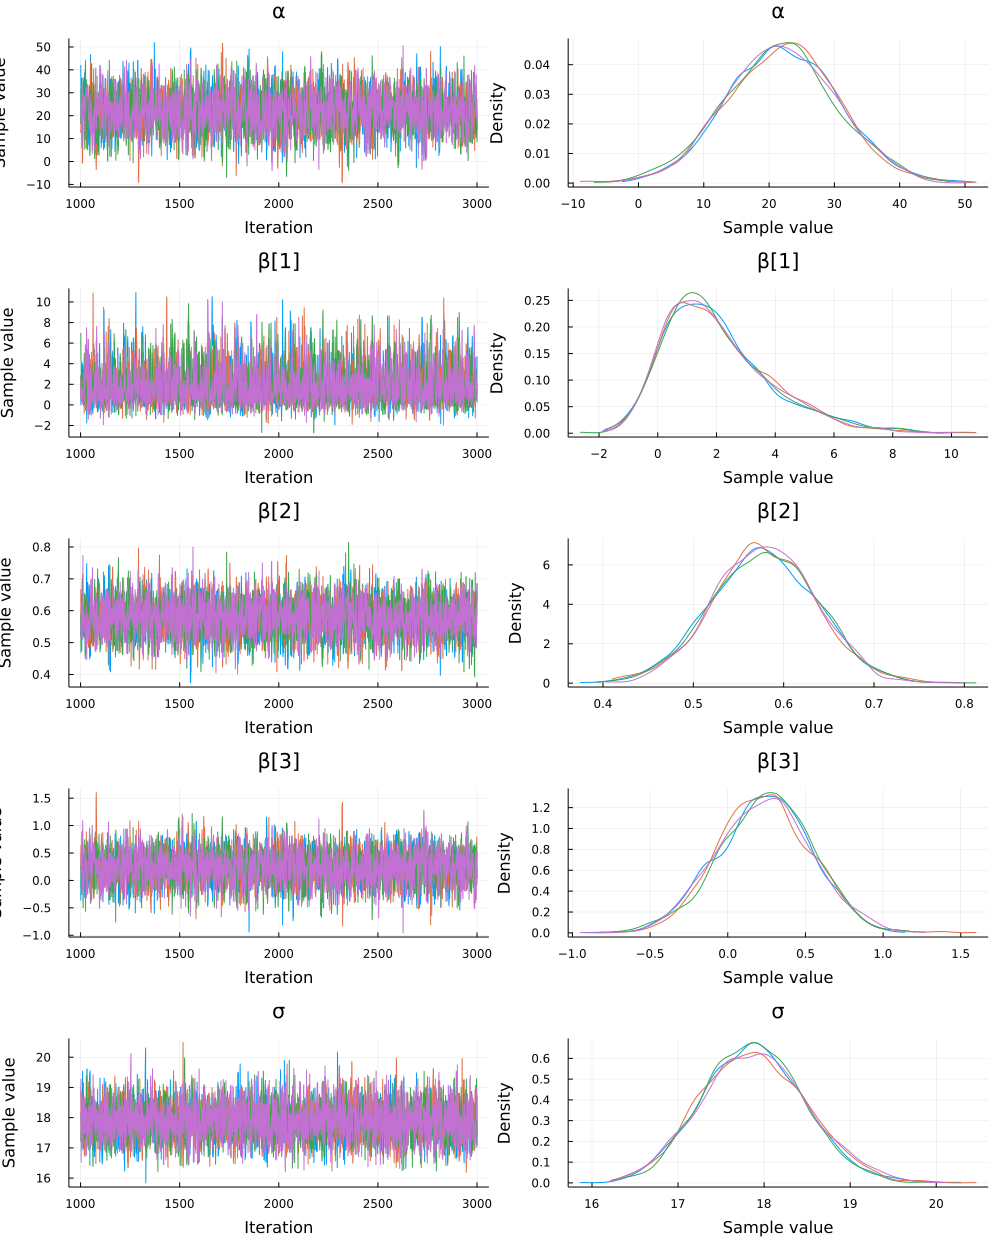

In [17]:
plot(chains)

## Comparisson with optimization

In [18]:
myfun(x) = 0.1x^2 + 1.0 
xdata = [range(0., 4.0, length=30);]
ydata = myfun.(xdata) + 0.1xdata.*randn(size(xdata)) 

mymodel1(x, a, b) = a*x^2 + b

mymodel1 (generic function with 1 method)

Plain data fitting

How to obtain confidence intervals from optim? IDK.

 * Status: success

 * Candidate solution
    Final objective value:     1.256292e+00

 * Found with
    Algorithm:     Nelder-Mead

 * Convergence measures
    √(Σ(yᵢ-ȳ)²)/n ≤ 1.0e-08

 * Work counters
    Seconds run:   0  (vs limit Inf)
    Iterations:    42
    f(x) calls:    83


2-element Vector{Float64}:
 0.12748185805386186
 0.9500501870093359

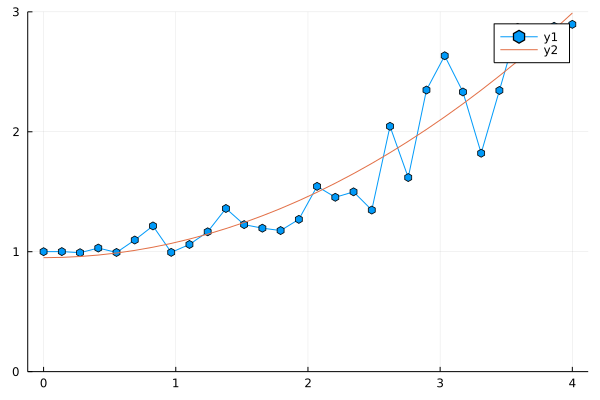

In [19]:
cost(p) = sum(abs2, mymodel1.(xdata, p[1], p[2]) .- ydata)
fit = optimize(cost, [1., 1.], NelderMead())
display(fit)
display(fit.minimizer)
a, b = fit.minimizer

plot(xdata, ydata, marker=:hex)
plot!(xdata, mymodel1.(xdata, a, b))
ylims!(0, 3)

MCMC simulation to estimate parameters and confidence interval

In [20]:
@model function mymodel2(x, y)
    s ~ Exponential(1)
    a ~ Normal(1, s)
    b ~ Normal(1, s)

    @. y ~ Normal(mymodel1(x, a, b), s)
    # Use brocasting macro (@.) instead of for loop
#     for i in eachindex(y)
#         y[i] ~ Normal(mymodel1(x[i], a, b), s)
#     end
end
# Run sampler, collect results.
@time chain = sample(mymodel2(xdata, ydata), NUTS(), 4_000)

 10.752357 seconds (20.82 M allocations: 1.413 GiB, 3.55% gc time, 96.43% compilation time)


Chains MCMC chain (4000×15×1 Array{Float64, 3}):

Iterations        = 1001:1:5000
Number of chains  = 1
Samples per chain = 4000
Wall duration     = 6.94 seconds
Compute duration  = 6.94 seconds
parameters        = s, a, b
internals         = lp, n_steps, is_accept, acceptance_rate, log_density, hamiltonian_energy, hamiltonian_energy_error, max_hamiltonian_energy_error, tree_depth, numerical_error, step_size, nom_step_size

Summary Statistics
  parameters      mean       std   naive_se      mcse         ess      rhat    ⋯
      Symbol   Float64   Float64    Float64   Float64     Float64   Float64    ⋯

           s    0.2696    0.0371     0.0006    0.0008   2145.6702    0.9999    ⋯
           a    0.1282    0.0098     0.0002    0.0002   2414.0503    1.0001    ⋯
           b    0.9467    0.0703     0.0011    0.0014   2530.2352    1.0000    ⋯
                                                                1 column omitted

Quantiles
  parameters      2.5%     25.0%     50.0%     75.0%   

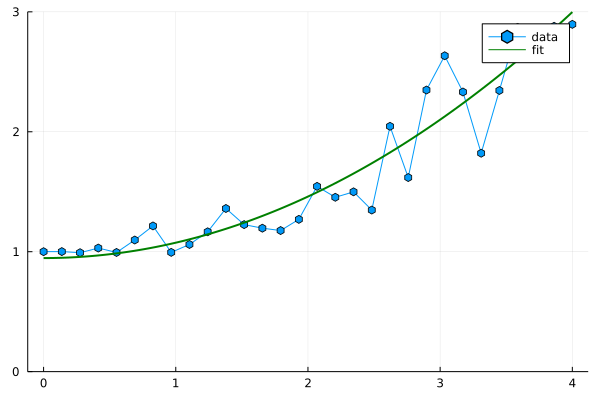

In [21]:
xx = range(0, 4, length = 100)
a, b = mean(chain[:a]), mean(chain[:b])
plot(xdata, ydata, marker=:hex, label="data")
plot!(xx, mymodel1.(xx, a, b),  line=(:green, 2), label="fit")
ylims!(0, 3)

## Differential equations

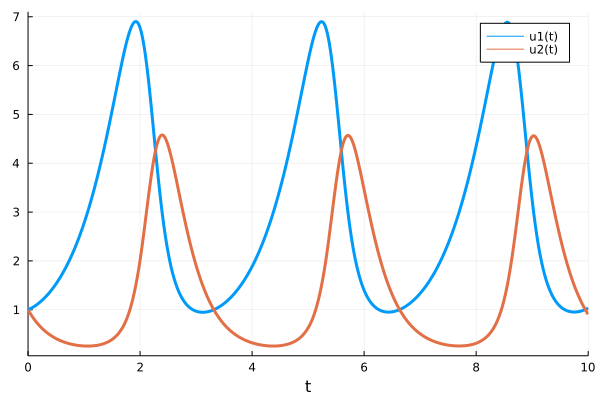

In [27]:
function lotka_volterra(du,u,p,t)
  x, y = u
  α, β, γ, δ  = p
  du[1] = (α - β*y)x # dx =
  du[2] = (δ*x - γ)y # dy =
end
p = [1.5, 1.0, 3.0, 1.0]
u0 = [1.0,1.0]
prob1 = ODEProblem(lotka_volterra,u0,(0.0,10.0),p)
sol = solve(prob1,Tsit5())
plot(sol, lw=3)

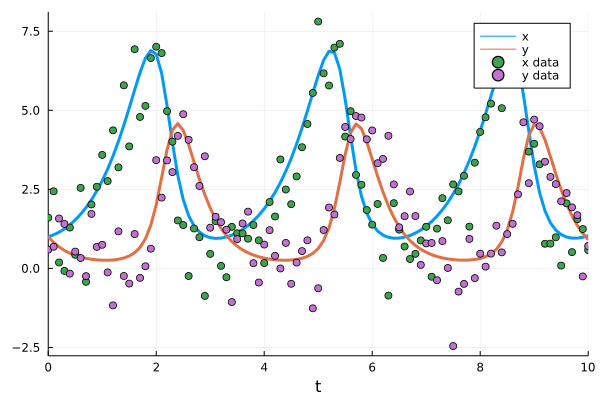

In [28]:
sol1 = solve(prob1, Tsit5(), saveat=0.1)
odedata = Array(sol1) + 0.8 * randn(size(Array(sol1)))
plot(sol1, lw=3, label=["x" "y"])
scatter!(sol1.t, odedata', label=["x data" "y data"])

In [39]:
Turing.setadbackend(:forwarddiff)

@model function fitlv(data, tdata, prob1)
    σ ~ InverseGamma(2, 3) # ~ is the tilde character
    α ~ truncated(Normal(1.5,0.5),0.5,2.5)
    β ~ truncated(Normal(1.2,0.5),0,2)
    γ ~ truncated(Normal(3.0,0.5),1,4)
    δ ~ truncated(Normal(1.0,0.5),0,2)

    p = [α,β,γ,δ]
    prob = remake(prob1, p=p)
    sol = solve(prob, Tsit5(), saveat=tdata)
    predicted = sol

    for i in 1:size(predicted, 1)
        @. data[i, :] ~ Normal(predicted[i, :], σ)
    end  
end

model = fitlv(odedata, sol1.t, prob1)

# This next command runs 4 independent chains without using multithreading.
@time chain = mapreduce(c -> sample(model, NUTS(.65), 1_000), chainscat, 1:4)

 23.213389 seconds (94.58 M allocations: 13.326 GiB, 6.81% gc time, 18.83% compilation time)


Chains MCMC chain (1000×17×4 Array{Float64, 3}):

Iterations        = 501:1:1500
Number of chains  = 4
Samples per chain = 1000
Wall duration     = 21.49 seconds
Compute duration  = 21.47 seconds
parameters        = σ, α, β, γ, δ
internals         = lp, n_steps, is_accept, acceptance_rate, log_density, hamiltonian_energy, hamiltonian_energy_error, max_hamiltonian_energy_error, tree_depth, numerical_error, step_size, nom_step_size

Summary Statistics
  parameters      mean       std   naive_se      mcse       ess      rhat   es ⋯
      Symbol   Float64   Float64    Float64   Float64   Float64   Float64      ⋯

           σ    1.1666    0.5538     0.0088    0.0687    8.1220    8.9411      ⋯
           α    1.6531    0.3143     0.0050    0.0382    8.4776    4.4121      ⋯
           β    1.1982    0.3822     0.0060    0.0469    8.2692    5.8034      ⋯
           γ    3.1262    0.2680     0.0042    0.0253   14.1875    1.5510      ⋯
           δ    1.2050    0.3121     0.0049    0.0376    8.

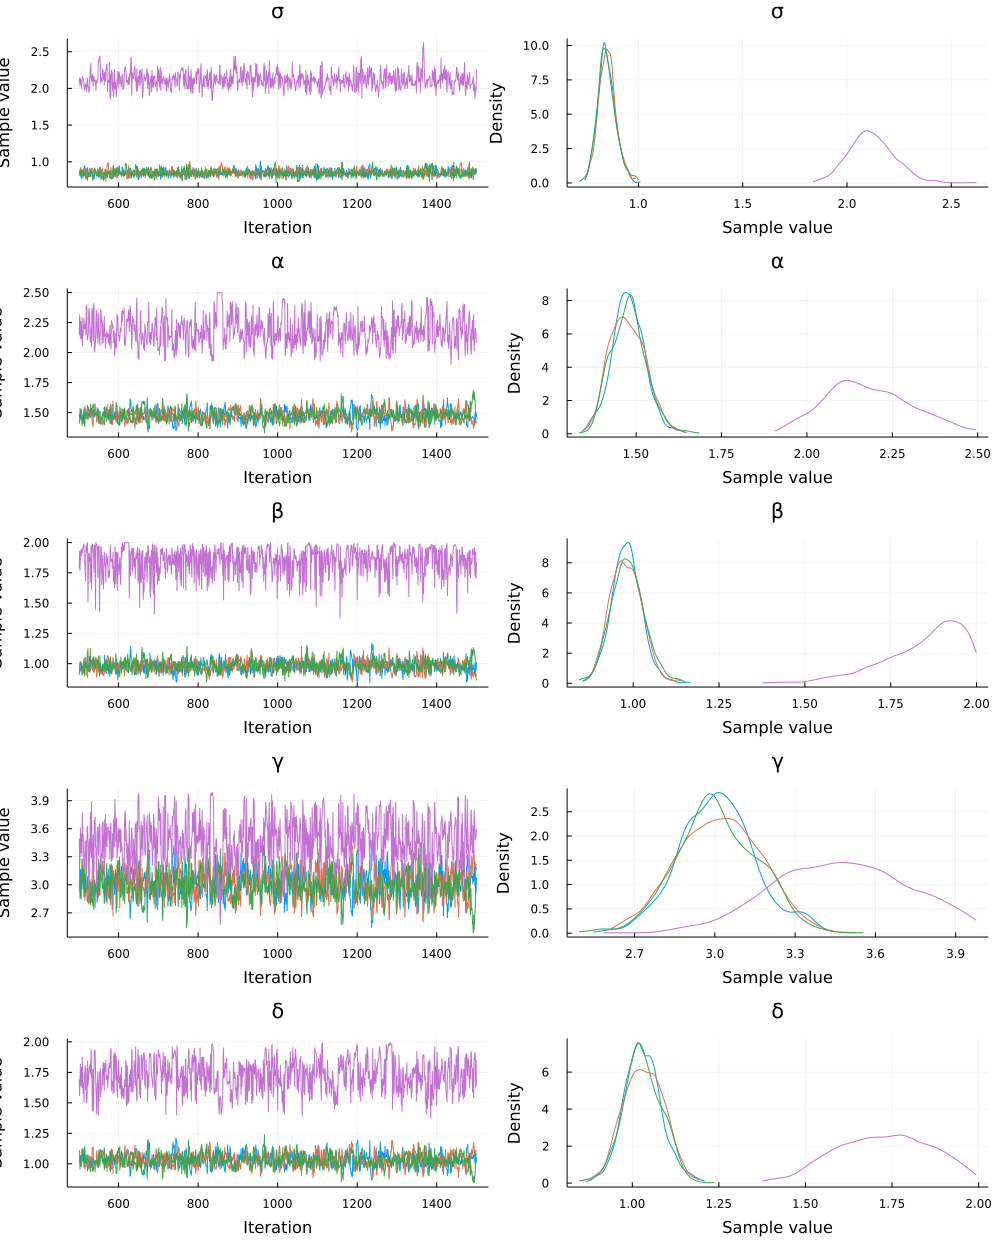

In [40]:
plot(chain)

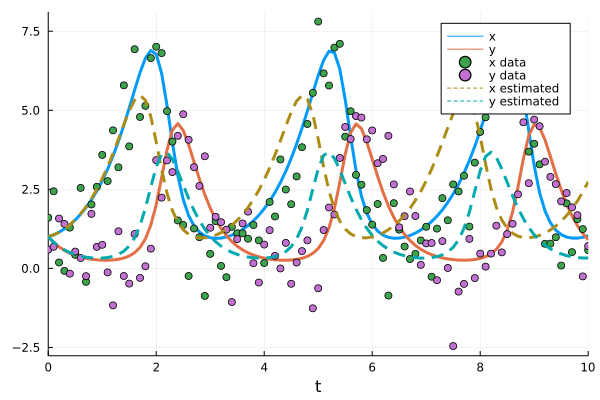

In [41]:
plot(sol1, lw=3, label=["x" "y"])
scatter!(sol1.t, odedata', label=["x data" "y data"])
p = mean(chain, [:α,:β,:γ,:δ]).nt.mean
sol2 = solve(remake(prob1, p=p), Tsit5(), saveat=0.1)
plot!(sol2, line=(3, :dash), label=["x estimated" "y estimated"])

In [16]:
println("This tutorial was created with Julia " * string(VERSION))

This tutorial was created with Julia 1.6.5


In [18]:
display("text/markdown", "**Computer Information:**")
vinfo = sprint(InteractiveUtils.versioninfo)
display("text/markdown",  "```$(vinfo)```")

using Pkg
display("text/markdown","Package Information:")
pkgs = ["Turing", "Statistics", "Distributions", "StatsBase", 
    "Random", "Optim", "Plots", "StatsPlots", "OrdinaryDiffEq", 
    "DataFrames", "CSV", "HTTP"]
Pkg.status(pkgs)

Computer Information:

```
Julia Version 1.6.5
Commit 9058264a69 (2021-12-19 12:30 UTC)
Platform Info:
  OS: Linux (x86_64-linux-gnu)
  CPU: AMD Ryzen 7 4700U with Radeon Graphics
  WORD_SIZE: 64
  LIBM: libopenlibm
  LLVM: libLLVM-11.0.1 (ORCJIT, znver2)

```


Package Information:

      Status `~/.julia/environments/v1.6/Project.toml`
  [336ed68f] CSV v0.9.11
  [a93c6f00] DataFrames v1.3.1
  [31c24e10] Distributions v0.25.38
  [cd3eb016] HTTP v0.9.17
  [429524aa] Optim v1.6.0
  [1dea7af3] OrdinaryDiffEq v6.4.1
  [91a5bcdd] Plots v1.25.5
  [2913bbd2] StatsBase v0.33.14
  [f3b207a7] StatsPlots v0.14.30
  [fce5fe82] Turing v0.19.3
